<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entender el problema**

En este cuaderno empleamos datos de segmentación de clientes de centros comerciales. Contiene la edad, el sexo, los ingresos y la puntuación de gasto de los clientes. Utilizaremos estas características para crear varios grupos de clientes, intentando identificar clientes atípicos dentro de cada grupo. A priori desconocemos el número de grupos, o patrones que se repiten dentro de la base de datos.


# **Datos** 

Este fichero contiene la información básica asignada por un centro comercial en función del comportamiento del cliente y su naturaleza de gasto (repositorio Kaggle: https://www.kaggle.com/datasets/shwetabh123/mall-customers) para el ejercicio planteado en este cuaderno.

# **Información de las variables de interés**:

Toda las variables son categóricas.

- CustomerID (numerica)
- Genre : género (categórica: 'Female','Male')
- Age : edad (numérica)
- Annual Income: ingresos anuales (numérica)
- Spending Score: puntuación (numérica)


# **Obtención y comprensión de datos**

En primer lugar cargamos algunas librerías necesarias para el análisis de datos. 

A continuación leemos los datos.

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
# Cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/URJCDSLab/Short_Courses/main/Clustering/code/Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
# Importar columnas numéricas
df_train = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
df_train.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# **Análisis Exploratorio**


Sería necesario un EDA completo. Aquí presentamos una versión simplificada.

In [6]:
df_train.shape

(200, 3)

In [7]:
df_train.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


#**Limpieza y Depuración de datos**

Chequeamos la existencia de valores faltantes.

In [9]:
df_train.isnull().sum()*100/df_train.shape[0]

Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Podemos decir que los datos están limpios puesto que no hay valores faltantes.


# **Modelización**

Ajustaremos el conjunto de datos de interés empleando el algoritmo DBSCAN con parámetros eps igual a $12.5$ y min_sample igual a $4$. Después, crearemos un DBSCAN_dataset y crearemos una columna 'Cluster' usando clustering.labels_. 

In [20]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(df_train)
DBSCAN_dataset = df_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 



Para visualizar la distribución de los conglomerados, utilizaremos value_counts() y lo convertiremos en un data frame. 

En este caso, tenemos 5 conglomerados y valores atípicos representados en el cluster -1. El cluster `0` tiene el mayor tamaño con 112 filas. 

In [21]:
DBSCAN_dataset.Cluster.value_counts().to_frame()


,Cluster
0,112
2,34
3,24
-1,18
1,8
4,4


# **Visualización**

A continuación utilizaremos la información anterior y visualizaremos el gráfico de dispersión.  

Hay dos gráficos: "Ingresos anuales frente a puntuación de gasto" e "Ingresos anuales frente a edad". Los conglomerados se definen por colores, y los valores atípicos se definen como pequeños puntos negros. 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


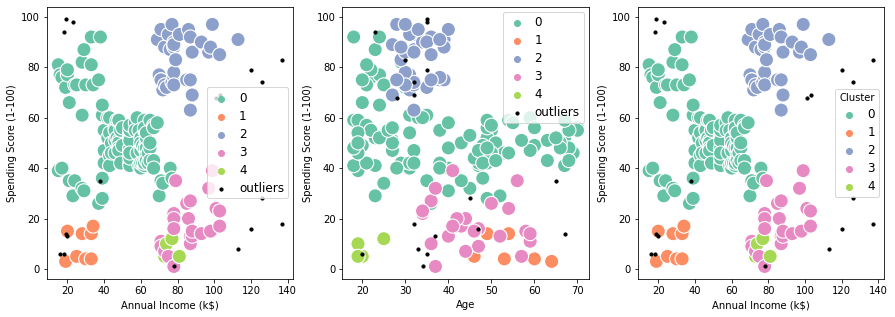

In [22]:

outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('Age', 'Spending Score (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[2], legend='full', s=200)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
axes[2].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")

axes[0].legend()
axes[1].legend()
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')
plt.setp(axes[2].get_legend().get_texts(), fontsize='12')


plt.show()


La visualización muestra claramente cómo cada cliente forma parte de uno de los 5 conglomerados, y podemos utilizar esta información para ofrecer ofertas de gama alta a los clientes con conglomerados de color morado y ofertas más baratas a los clientes con conglomerados de color verde oscuro. 

---
**DSLAB- Isaac Martín de Diego - 2023**


